In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load Data
df = pd.read_csv('obesitas.csv')

In [ ]:
# EDA
print(df.head())
print(" ")
print(df.info())
print(" ")
print(df.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  NObeyesdad  
0  Public_Transportation      Normal  
1  Public_Transportation      Normal  
2  Public_Transportation      Normal  
3                Wal

In [ ]:
# Cek data duplicate
df.duplicated().sum()

24

In [ ]:
# Hapus data duplicate
df.drop_duplicates(inplace = True)

In [ ]:
# Cek lagi duplicate
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1aba0ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1aba0bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1aba0b7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1ab894550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1ab8947f0>],
 'means': []}

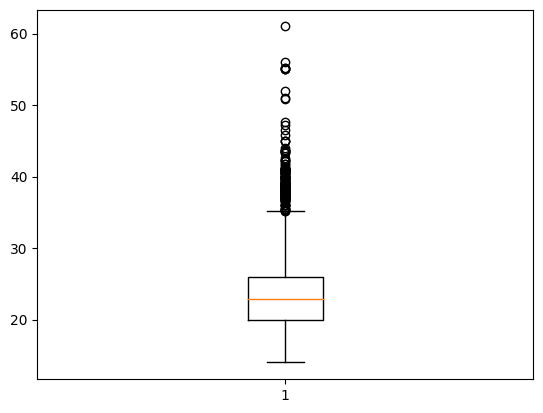

In [ ]:
# Cek outlier di Age
plt.boxplot(df['Age'])

In [ ]:
# Normalisasi nilai Age dengan Z-score
from scipy.stats import zscore

df['Age'] = zscore(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a9770cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a97710f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a9770a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a9771630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a97718d0>],
 'means': []}

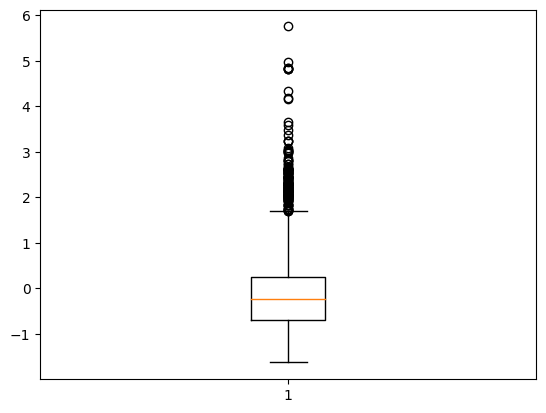

In [ ]:
# Cek lagi outlier di Age
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a97ecdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a97ed330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a97ecc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a97ed870>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a97edb10>],
 'means': []}

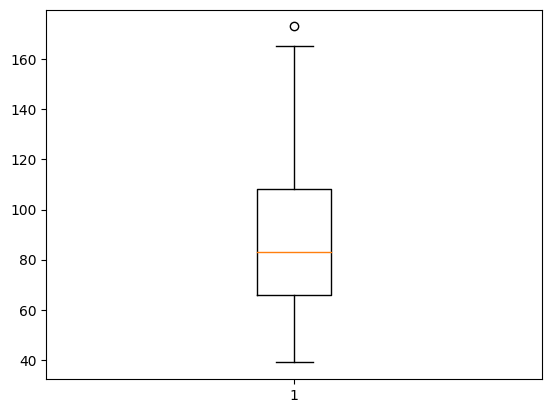

In [ ]:
# Cek outlier di Weight
plt.boxplot(df['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a96740a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a96745e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a9847dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a9674b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a9674dc0>],
 'means': []}

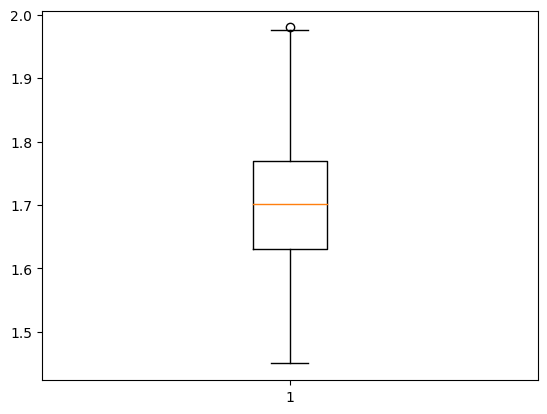

In [ ]:
# Cek outlier di Height
plt.boxplot(df['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a96b6e00>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a96b7340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a96b6b60>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a96b7880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a96b7b20>],
 'means': []}

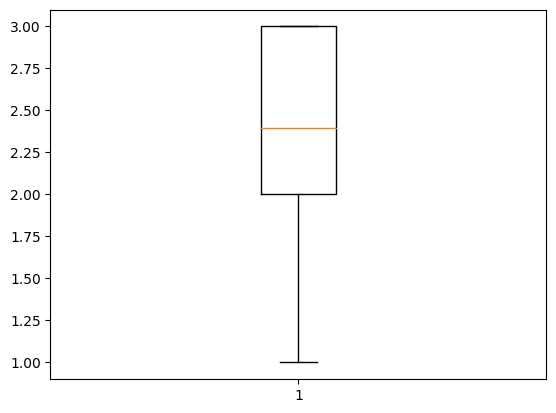

In [ ]:
# Cek outlier di FCVC
plt.boxplot(df['FCVC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a972f730>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a972fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a972f490>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a955c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a955c370>],
 'means': []}

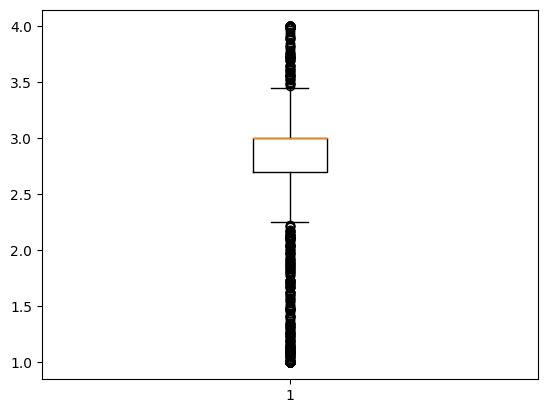

In [ ]:
# Cek outlier di NCP
plt.boxplot(df['NCP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a95aef80>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a95af4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a95adcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a95afa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a95afca0>],
 'means': []}

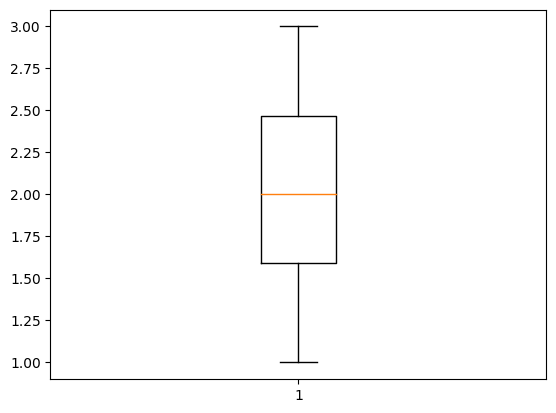

In [ ]:
# Cek outlier di CH2O
plt.boxplot(df['CH2O'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a962b520>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a962ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a962b280>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a962bfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a945c280>],
 'means': []}

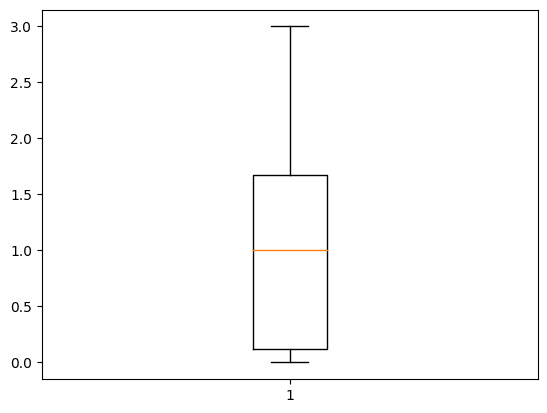

In [ ]:
# Cek outlier di FAF
plt.boxplot(df['FAF'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a949ead0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a949f010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a949e830>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a949f550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a949f7f0>],
 'means': []}

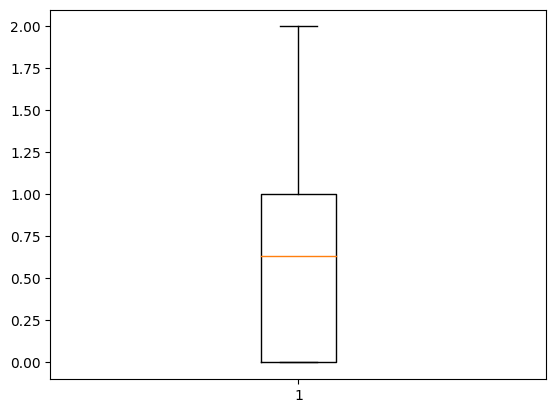

In [ ]:
# Cek outlier di TUE
plt.boxplot(df['TUE'])

In [ ]:
# Hapus outlier
def drop_outliers_iqr(dataframe, column):
    # Check if the column contains numeric values
    if dataframe[column].dtype in [int, float]:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows that are outside the IQR boundaries
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
        return dataframe
    else:
        print(f"Column '{column}' contains non-numeric values.")
        return dataframe

In [ ]:
# Drop outlier di Weight dan Height (karna cuma dikit jadi hapus aja)
columns_to_check = ['Weight', 'Height']
for col in columns_to_check:
  df = drop_outliers_iqr(df, col)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a9512d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a9513250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a9512a70>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a9513790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a9513a30>],
 'means': []}

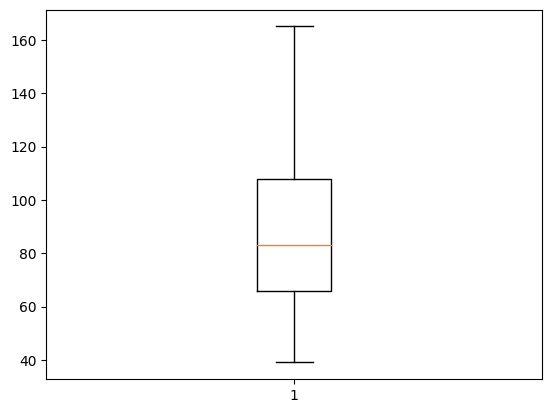

In [ ]:
# Cek lagi outlier di Weight
plt.boxplot(df['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc1a938a740>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc1a938ac80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc1a938a4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc1a938b1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc1a938b460>],
 'means': []}

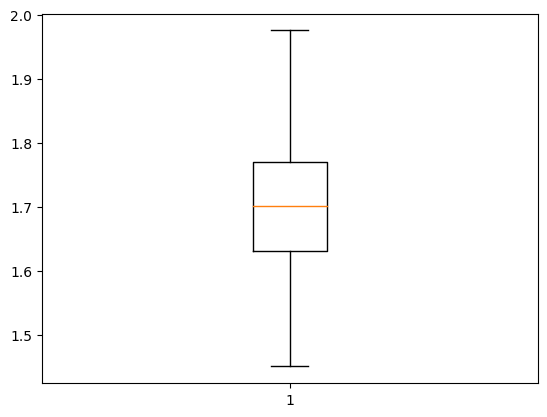

In [ ]:
# Cek lagi outlier di Height
plt.boxplot(df['Height'])

<ipython-input-22-6c1423f49020>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="Gender",palette =sns.color_palette("Set1"))


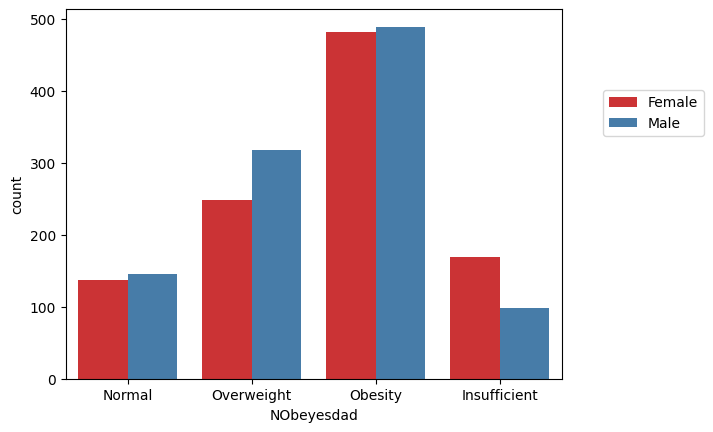

In [ ]:
# Hubungan Gender dengan Obesitas
sns.countplot(df,x="NObeyesdad",hue="Gender",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-23-6e0aa50702c8>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="family_history_with_overweight",palette =sns.color_palette("Set1"))


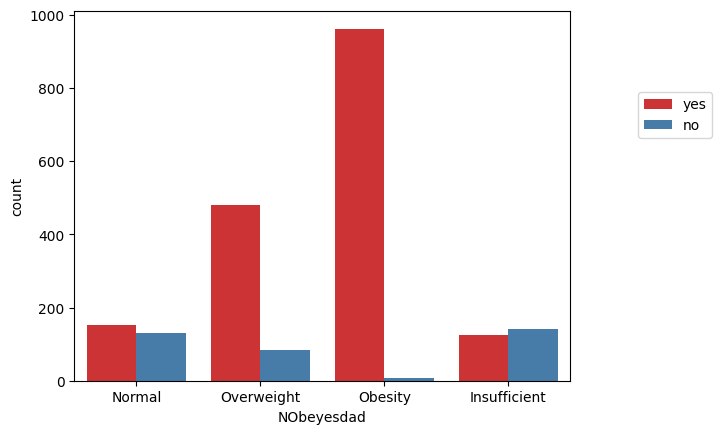

In [ ]:
# Hubungan Family History dengan Obesitas
sns.countplot(df,x="NObeyesdad",hue="family_history_with_overweight",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-24-af437059bee4>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="FAVC",palette =sns.color_palette("Set1"))


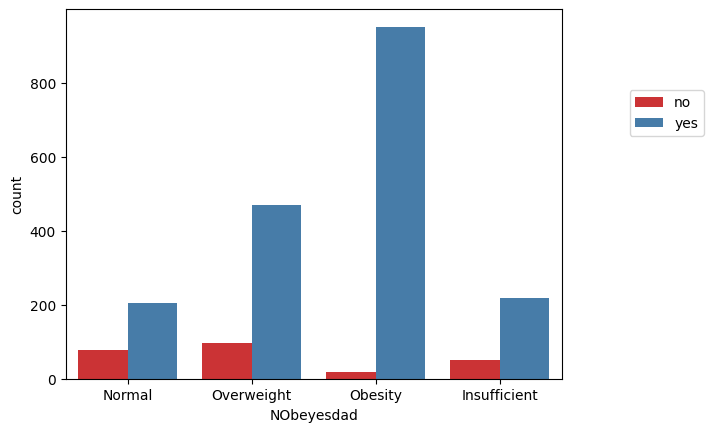

In [ ]:
# Hubungan FAVC dan Obesitas
sns.countplot(df,x="NObeyesdad",hue="FAVC",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-25-6cb7b1c62809>:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="CAEC",palette =sns.color_palette("Set1"))


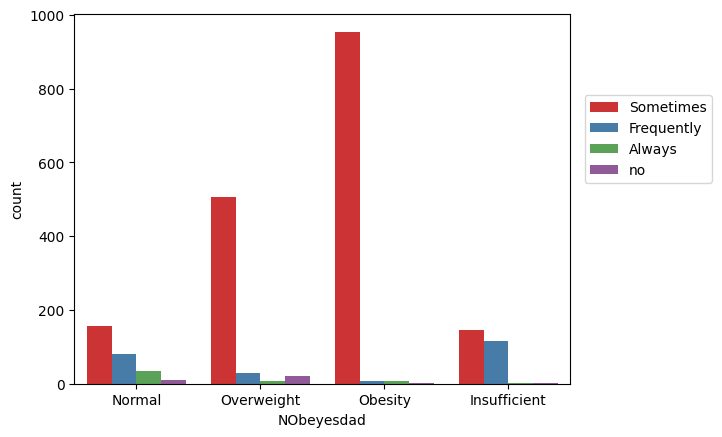

In [ ]:
# Hubungan CAEC dan Obesitas
sns.countplot(df,x="NObeyesdad",hue="CAEC",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-26-5682c5447ab9>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="SMOKE",palette =sns.color_palette("Set1"))


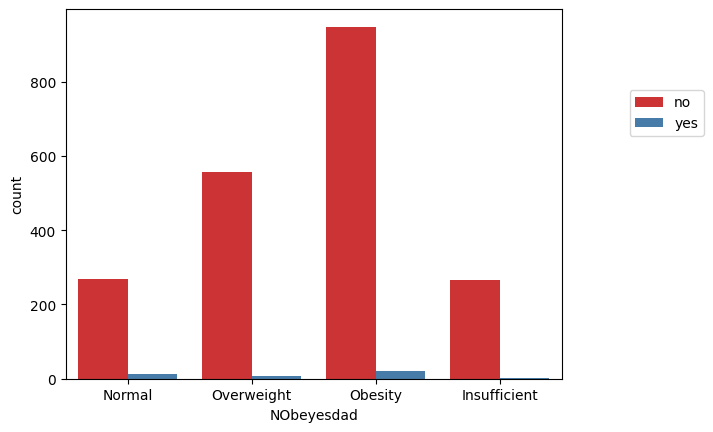

In [ ]:
# Hubungan SMOKE dan Obesitas
sns.countplot(df,x="NObeyesdad",hue="SMOKE",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-27-73d9d11d2cbb>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="SCC",palette =sns.color_palette("Set1"))


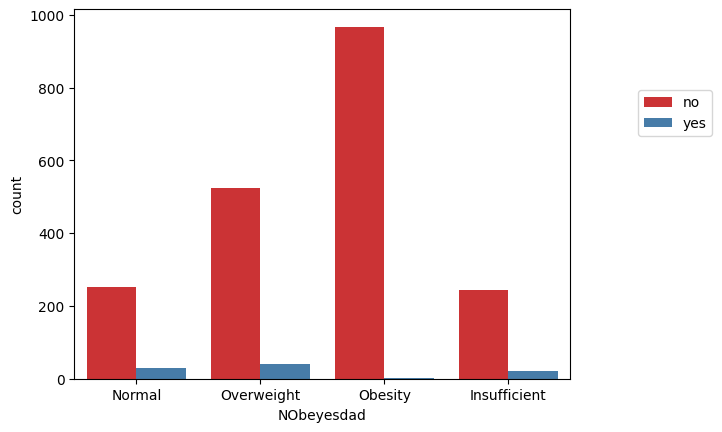

In [ ]:
# Hubungan SCC dan Obesitas
sns.countplot(df,x="NObeyesdad",hue="SCC",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-28-52ed6172d601>:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="CALC",palette =sns.color_palette("Set1"))


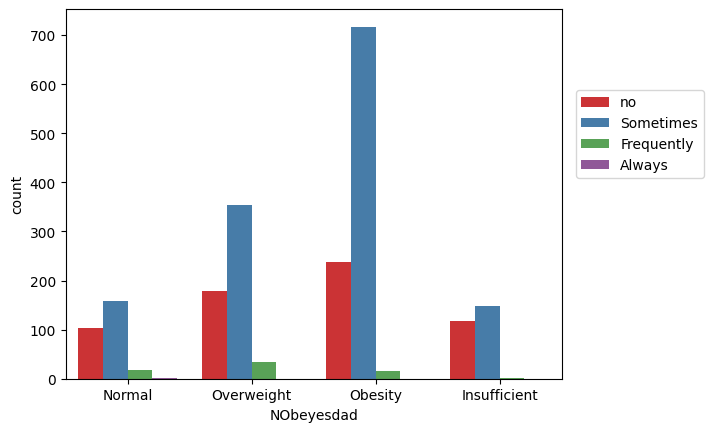

In [ ]:
# Hubungan CALC dengan Obesitas
sns.countplot(df,x="NObeyesdad",hue="CALC",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

<ipython-input-29-8ea46a4edbcd>:2: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.countplot(df,x="NObeyesdad",hue="MTRANS",palette =sns.color_palette("Set1"))


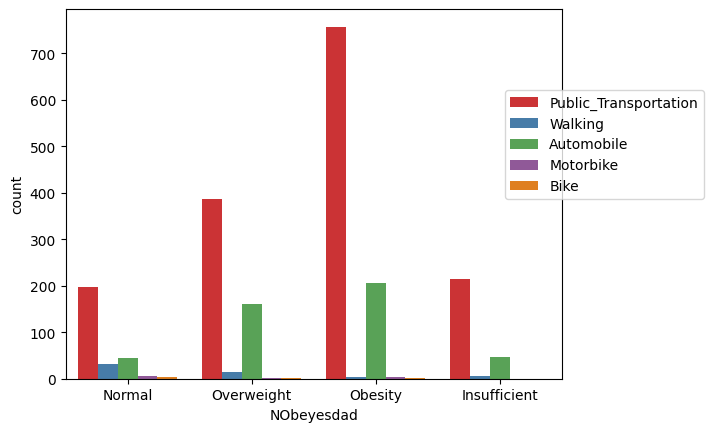

In [ ]:
# Hubungan MTRANS dan Obesitas
sns.countplot(df,x="NObeyesdad",hue="MTRANS",palette =sns.color_palette("Set1"))
plt.legend(bbox_to_anchor =(1.3,0.8))

In [ ]:
# Melihat jumlah dari tiap gender
df.Gender.value_counts()

Gender
Male      1050
Female    1035
Name: count, dtype: int64

In [ ]:
# Rata-rata weight dari orang yang obesitas atau tidak
df.groupby("NObeyesdad")["Weight"].mean()

NObeyesdad
Insufficient     50.013190
Normal           62.164894
Obesity         109.000039
Overweight       78.378284
Name: Weight, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Insufficient'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Overweight')])

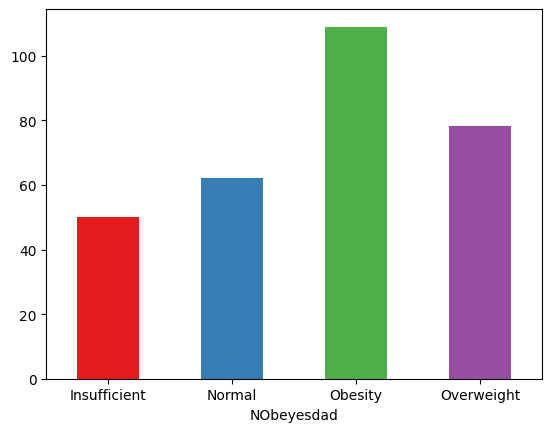

In [ ]:
# Plotting rata-rata Weight dari NObeyesdad
df.groupby("NObeyesdad")["Weight"].mean().plot(kind="bar",color =sns.color_palette("Set1"))
plt.xticks(rotation=0)

In [ ]:
# Rata-rata height orang yang obesitas dan tidak
df.groupby("NObeyesdad")["Height"].mean()

NObeyesdad
Insufficient    1.693572
Normal          1.676950
Obesity         1.715121
Overweight      1.697667
Name: Height, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Insufficient'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Overweight')])

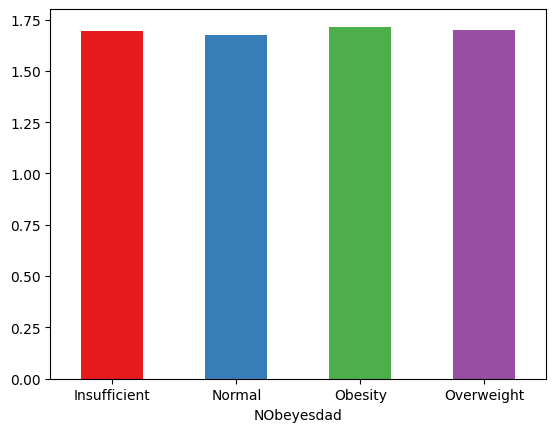

In [ ]:
# Plotting rata-rata height dari NObeyesdad
df.groupby("NObeyesdad")["Height"].mean().plot(kind="bar",color =sns.color_palette("Set1"))
plt.xticks(rotation=0)

In [ ]:
# Correlation
corr_df = df.copy()
encoder  = LabelEncoder()
for col in corr_df.select_dtypes(include="object").columns:
    corr_df[col] =encoder.fit_transform(corr_df[col])

<Axes: >

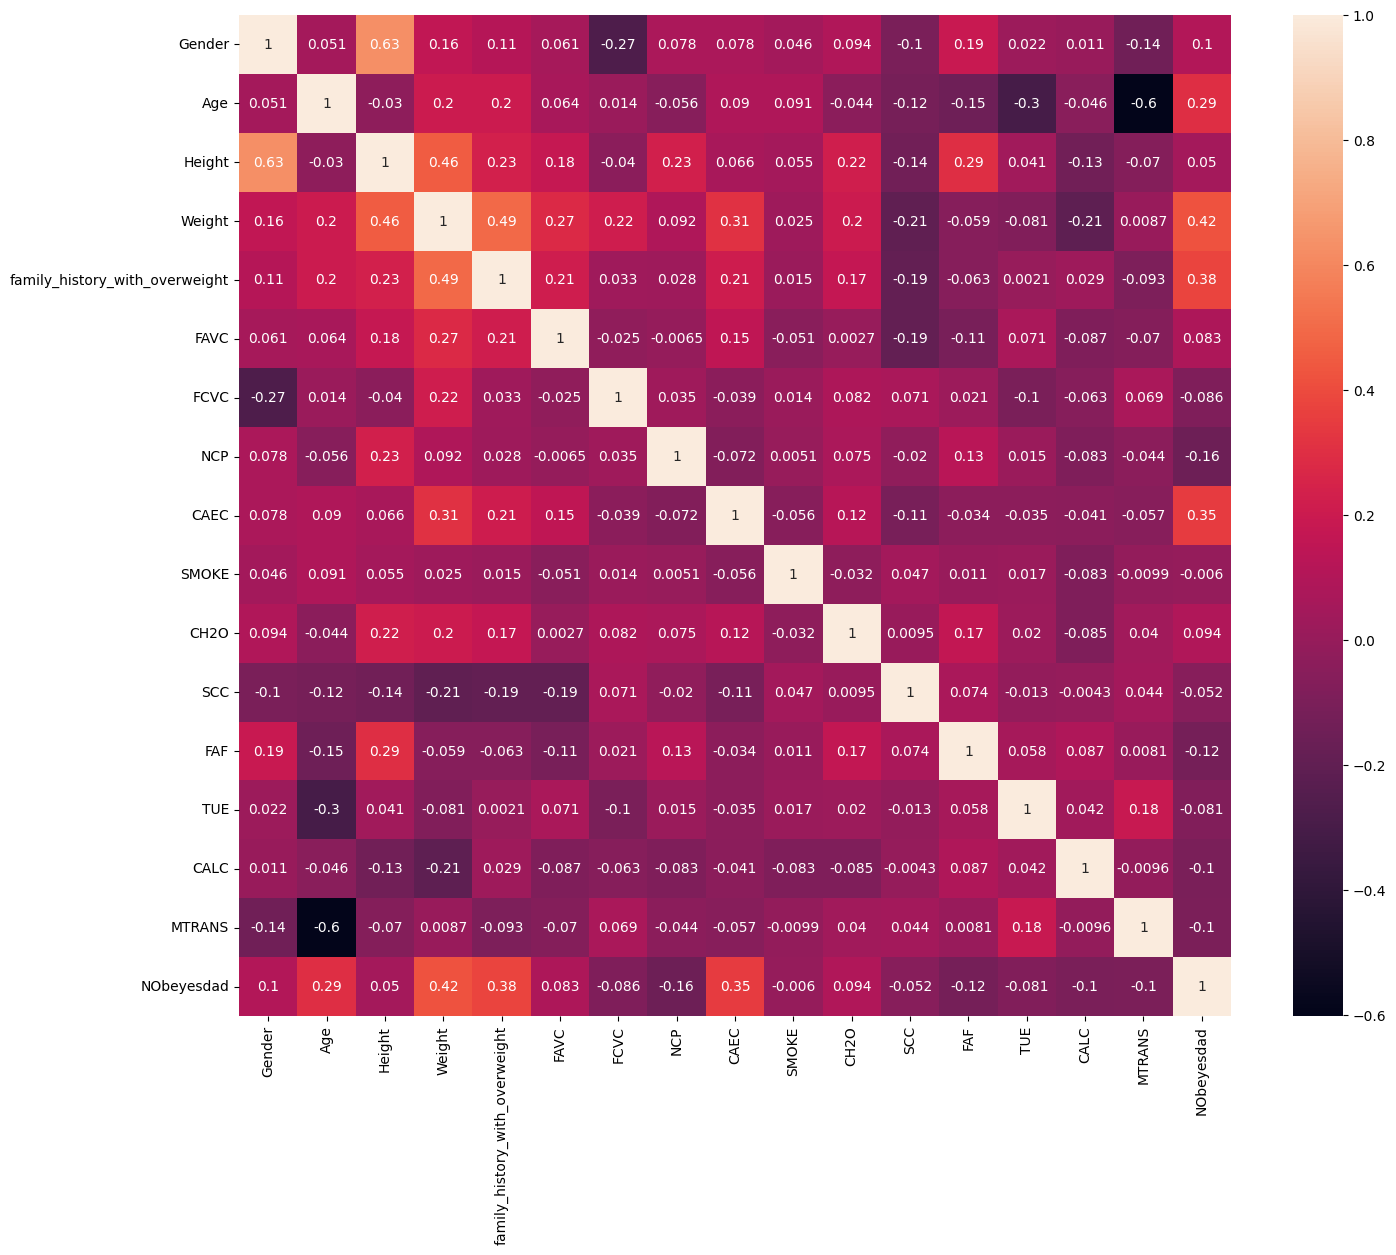

In [ ]:
# Plotting correlation
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_df.corr(),annot=True)

In [ ]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
for col in ['Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    scaler.fit(df[[col]])
    df[col]=scaler.transform(df[[col]])

In [ ]:
# Cek nilai unique
print(df['Gender'].unique())
print(df['family_history_with_overweight'].unique())
print(df['FAVC'].unique())
print(df['CAEC'].unique())
print(df['SMOKE'].unique())
print(df['SCC'].unique())
print(df['CALC'].unique())
print(df['MTRANS'].unique())
print(df['NObeyesdad'].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal' 'Overweight' 'Obesity' 'Insufficient']


In [ ]:
# Encoding semua kolom kategorik
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

history_mapping = {'yes': 0, 'no': 1}
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(history_mapping)

favc_mapping = {'no': 0, 'yes': 1}
df['FAVC'] = df['FAVC'].map(favc_mapping)

caec_mapping = {'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3}
df['CAEC'] = df['CAEC'].map(caec_mapping)

smoking_mapping = {'no': 0, 'yes': 1}
df['SMOKE'] = df['SMOKE'].map(smoking_mapping)

scc_mapping = {'no': 0, 'yes': 1}
df['SCC'] = df['SCC'].map(scc_mapping)

calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['CALC'] = df['CALC'].map(calc_mapping)

mtrans_mapping = {'Walking': 0, 'Bike': 1, 'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4}
df['MTRANS'] = df['MTRANS'].map(mtrans_mapping)

obesity_mapping = {'Insufficient': 0, 'Normal': 1, 'Overweight': 2, 'Obesity': 3}
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_mapping)

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.526613,0.323401,0.198323,0,0,0.5,0.666667,0,0,0.5,0,0.000000,0.5,0,2,1
1,0,-0.526613,0.133165,0.134859,0,0,1.0,0.666667,0,1,1.0,1,1.000000,0.0,1,2,1
2,1,-0.212507,0.665826,0.301450,0,0,0.5,0.666667,0,0,0.5,0,0.666667,0.5,2,2,1
3,1,0.415705,0.665826,0.380779,1,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,2,0,2
4,1,-0.369560,0.627779,0.402991,1,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,1,2,2


In [ ]:
# Pembuatan model
X = df.drop(columns="NObeyesdad")
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Linear Regression score:", model.score(X_test, y_test))

Linear Regression score: 0.8657680507216372


In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Menghitung mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Menghitung mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Menghitung root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Root Mean Squared Error:", rmse)

# R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 0.31738618222094356
Mean Squared Error: 0.15481738307829374
Root Mean Squared Error: 0.39346840162622176
R2 score: 0.8657680507216372


In [ ]:
# Tabel evaluasi
evaluation_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Value': [mae * 100, mse * 100, rmse * 100, r2 * 100]
})

print(evaluation_table)

                           Metric      Value
0       Mean Absolute Error (MAE)  31.738618
1        Mean Squared Error (MSE)  15.481738
2  Root Mean Squared Error (RMSE)  39.346840
3                  R-squared (R²)  86.576805


In [ ]:
# Metode SVM (untuk perbandingan)
from sklearn.svm import SVC

model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Membuat prediksi dengan SVM
y_pred_svm = model_svm.predict(X_test)

In [ ]:
# Evaluasi menggunakan confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred_svm)
cr = classification_report(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

In [ ]:
# Hasil evaluasi SVM
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[ 81   5   0   0]
 [ 26  43  22   0]
 [  0   9 149   3]
 [  0   1   6 281]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        86
           1       0.74      0.47      0.58        91
           2       0.84      0.93      0.88       161
           3       0.99      0.98      0.98       288

    accuracy                           0.88       626
   macro avg       0.83      0.83      0.82       626
weighted avg       0.88      0.88      0.88       626

Accuracy: 0.8850
Precision: 0.8835
Recall: 0.8850
F1 Score: 0.8780


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_prediction = bayes.predict(X_test)
accuracy = accuracy_score(y_test, bayes_prediction)
print("accuracy:", accuracy)

accuracy: 0.6405750798722045


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8210862619808307


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
